In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset/boston.csv")

In [3]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB
None
               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341 

In [4]:
dataset.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
inputs = dataset.iloc[:, 1:14].values
targets = dataset.iloc[:, 14].values.reshape(len(dataset), 1)
inputs, targets

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, ..., 1.8700e+01, 3.9463e+02,
         2.9400e+00],
        ...,
        [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         9.0800e+00],
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([[24. ],
        [21.6],
        [33.4],
        [36.2],
        [22.9],
        [15. ],
        [18.9],
        [21.7],
        [20.4],
        [18.2],
        [19.9],
        [23.1],
        [20.2],
        [13.6],
        [19.6],
        [15.2],
        [14.5],
        [14.8],
        [12.7],
        [14.5],
        [13.5],
        [24.7],
        [30.8],
        [34.9],
        [25.3],
        [

In [6]:
print(inputs.shape)
print(targets.shape)

(333, 13)
(333, 1)


In [7]:
type(inputs), type(targets)

(numpy.ndarray, numpy.ndarray)

Converting numpy to tensor

In [8]:
import torch

In [9]:
inputs = torch.from_numpy(inputs)

In [10]:
targets = torch.from_numpy(targets)

In [11]:
inputs, targets

(tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00,  ..., 1.5300e+01, 3.9690e+02,
          4.9800e+00],
         [2.7310e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9690e+02,
          9.1400e+00],
         [3.2370e-02, 0.0000e+00, 2.1800e+00,  ..., 1.8700e+01, 3.9463e+02,
          2.9400e+00],
         ...,
         [4.5270e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
          9.0800e+00],
         [6.0760e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
          5.6400e+00],
         [4.7410e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
          7.8800e+00]], dtype=torch.float64),
 tensor([[24.0000],
         [21.6000],
         [33.4000],
         [36.2000],
         [22.9000],
         [15.0000],
         [18.9000],
         [21.7000],
         [20.4000],
         [18.2000],
         [19.9000],
         [23.1000],
         [20.2000],
         [13.6000],
         [19.6000],
         [15.2000],
         [14.5000],
         [14.8000],
         

Importing DatasetTransfer to load the data in Data Loader

In [12]:
from torch.utils.data import TensorDataset, random_split, DataLoader

In [13]:
tensor_data = TensorDataset(inputs, targets)

In [14]:
train_ds, val_ds, test_ds = random_split(tensor_data, [300, 20, 13])

In [15]:
train_ds, val_ds, test_ds

(<torch.utils.data.dataset.Subset at 0x216096052d0>,
 <torch.utils.data.dataset.Subset at 0x2160a259790>)

In [16]:
batch_size = 5
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [17]:
for x, y in train_loader:
    break
x, y

(tensor([[6.8990e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 5.8700e+00,
          6.9700e+01, 2.2577e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.8915e+02,
          1.4370e+01],
         [4.2613e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 7.7000e-01, 6.1120e+00,
          8.1300e+01, 2.5091e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.9074e+02,
          1.2670e+01],
         [1.1308e+00, 0.0000e+00, 8.1400e+00, 0.0000e+00, 5.3800e-01, 5.7130e+00,
          9.4100e+01, 4.2330e+00, 4.0000e+00, 3.0700e+02, 2.1000e+01, 3.6017e+02,
          2.2600e+01],
         [8.8260e-02, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01, 6.4170e+00,
          6.6000e+00, 5.2873e+00, 4.0000e+00, 3.0500e+02, 1.9200e+01, 3.8373e+02,
          6.7200e+00],
         [1.4052e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 6.3750e+00,
          3.2300e+01, 3.9454e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.8581e+02,
          9.3800e+00]], dtype=torch.float64),
 tensor([[22.0000],
         [22.6000],
  

# Linear Regression Model Using Pytorch

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [27]:
torch.set_default_dtype(torch.float64)

In [76]:
class BostonModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(13, 1)
        self.history = []
    
    
    def _prediction_(self, _input_):
        return self.linear(_input_)
    
    def _loss_cal_(self, batch):# using mse as the loss function, will low loss rate, so using rms to increase the loss rate
        _input_, _target_ = batch
        pred = self._prediction_(_input_)
        mse = F.mse_loss(pred, _target_)
        rms = torch.sqrt(mse)
        return rms
    

    def _validation_step_(self, batch): # this will be given at validation phase.
        loss = self._loss_cal_(batch)
        return {'val_loss': loss.detach()}
    
    def _validation_epoch_end_(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def _evaluate_(self, val_loader):
        outputs = [self._validation_step_(batch) for batch in val_loader]
        return self._validation_epoch_end_(outputs)
    
    def _epoch_end_(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
    
    def _training_(self, epochs, lr, train_loader, val_loader, opt_fun = torch.optim.SGD):
        
        optimizer = opt_fun(self.linear.parameters(), lr)
        
        for epoch in range(epochs):
            
            # training phase
            for batch in train_loader:
                loss = self._loss_cal_(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            
            # validation phase
            result = self._evaluate_(val_loader)
            self._epoch_end_(epoch, result)
            self.history.append(result['val_loss'])

In [77]:
model = BostonModel()

In [78]:
list(model.linear.parameters())

[Parameter containing:
 tensor([[ 0.0652, -0.0196, -0.1163,  0.2667, -0.2123, -0.2591,  0.0671,  0.1471,
           0.1492,  0.2034, -0.0718, -0.2118,  0.1631]], requires_grad=True),
 Parameter containing:
 tensor([0.1357], requires_grad=True)]

In [79]:
model._training_(200, 0.0000001, train_loader, val_loader)

Epoch [0], val_loss: 47.6781
Epoch [1], val_loss: 47.4950
Epoch [2], val_loss: 47.3244
Epoch [3], val_loss: 47.1384
Epoch [4], val_loss: 46.9626
Epoch [5], val_loss: 46.7973
Epoch [6], val_loss: 46.6093
Epoch [7], val_loss: 46.4499
Epoch [8], val_loss: 46.2984
Epoch [9], val_loss: 46.1480
Epoch [10], val_loss: 45.9722
Epoch [11], val_loss: 45.8013
Epoch [12], val_loss: 45.6398
Epoch [13], val_loss: 45.4936
Epoch [14], val_loss: 45.3431
Epoch [15], val_loss: 45.1969
Epoch [16], val_loss: 45.0650
Epoch [17], val_loss: 44.9090
Epoch [18], val_loss: 44.7643
Epoch [19], val_loss: 44.6150
Epoch [20], val_loss: 44.4766
Epoch [21], val_loss: 44.3210
Epoch [22], val_loss: 44.1782
Epoch [23], val_loss: 44.0579
Epoch [24], val_loss: 43.9335
Epoch [25], val_loss: 43.7939
Epoch [26], val_loss: 43.6509
Epoch [27], val_loss: 43.5076
Epoch [28], val_loss: 43.3752
Epoch [29], val_loss: 43.2428
Epoch [30], val_loss: 43.0892
Epoch [31], val_loss: 42.9555
Epoch [32], val_loss: 42.8196
Epoch [33], val_loss

In [80]:
model.history

[47.678100833761995,
 47.49499865636183,
 47.32436891368628,
 47.138432872621856,
 46.96257530970556,
 46.79725286940614,
 46.60925958640548,
 46.449925588497166,
 46.29843168449335,
 46.14803303551156,
 45.97223992333447,
 45.80131897236423,
 45.639824601093366,
 45.49362890072397,
 45.34308771420305,
 45.19694311384671,
 45.0649886757574,
 44.90903682429222,
 44.76432215381902,
 44.61499419818088,
 44.47657238743717,
 44.32101114975366,
 44.17815214867059,
 44.057935654186295,
 43.93351696645347,
 43.79391699073523,
 43.65094710964284,
 43.50763500024653,
 43.375162398203955,
 43.24276051863668,
 43.08915395396728,
 42.95548859598257,
 42.81960208758659,
 42.69688280875393,
 42.557054292435424,
 42.43757327046536,
 42.33869718192575,
 42.20872118227002,
 42.09616859986257,
 41.98113394310658,
 41.82902059819337,
 41.70359417786572,
 41.563531074547726,
 41.44765032959201,
 41.350744916065636,
 41.24088713075406,
 41.13588855140311,
 41.00687726466298,
 40.87467985497416,
 40.76390413

In [81]:
list(model.linear.parameters())

[Parameter containing:
 tensor([[ 0.0606, -0.0073, -0.1197,  0.2667, -0.2123, -0.2574,  0.0636,  0.1491,
           0.1425,  0.1051, -0.0690, -0.0790,  0.1603]], requires_grad=True),
 Parameter containing:
 tensor([0.1359], requires_grad=True)]

In [82]:
model._training_(50, 0.0000001, train_loader, val_loader)

Epoch [0], val_loss: 25.1845
Epoch [1], val_loss: 25.0923
Epoch [2], val_loss: 24.9918
Epoch [3], val_loss: 24.8933
Epoch [4], val_loss: 24.7914
Epoch [5], val_loss: 24.6921
Epoch [6], val_loss: 24.5708
Epoch [7], val_loss: 24.4610
Epoch [8], val_loss: 24.3712
Epoch [9], val_loss: 24.2676
Epoch [10], val_loss: 24.1754
Epoch [11], val_loss: 24.0880
Epoch [12], val_loss: 24.0005
Epoch [13], val_loss: 23.9032
Epoch [14], val_loss: 23.7978
Epoch [15], val_loss: 23.7122
Epoch [16], val_loss: 23.6215
Epoch [17], val_loss: 23.5078
Epoch [18], val_loss: 23.3999
Epoch [19], val_loss: 23.3215
Epoch [20], val_loss: 23.2215
Epoch [21], val_loss: 23.1426
Epoch [22], val_loss: 23.0520
Epoch [23], val_loss: 22.9647
Epoch [24], val_loss: 22.8556
Epoch [25], val_loss: 22.7714
Epoch [26], val_loss: 22.6768
Epoch [27], val_loss: 22.5866
Epoch [28], val_loss: 22.4890
Epoch [29], val_loss: 22.3866
Epoch [30], val_loss: 22.3116
Epoch [31], val_loss: 22.2300
Epoch [32], val_loss: 22.1358
Epoch [33], val_loss

In [83]:
model._training_(200, 0.000001, train_loader, val_loader)

Epoch [0], val_loss: 19.6581
Epoch [1], val_loss: 18.6473
Epoch [2], val_loss: 17.8176
Epoch [3], val_loss: 16.7787
Epoch [4], val_loss: 16.1317
Epoch [5], val_loss: 15.1416
Epoch [6], val_loss: 14.3196
Epoch [7], val_loss: 13.6424
Epoch [8], val_loss: 12.7166
Epoch [9], val_loss: 12.1788
Epoch [10], val_loss: 11.2593
Epoch [11], val_loss: 10.5708
Epoch [12], val_loss: 10.1380
Epoch [13], val_loss: 9.4931
Epoch [14], val_loss: 8.9170
Epoch [15], val_loss: 8.4594
Epoch [16], val_loss: 8.2661
Epoch [17], val_loss: 8.0411
Epoch [18], val_loss: 7.5593
Epoch [19], val_loss: 7.4894
Epoch [20], val_loss: 7.3957
Epoch [21], val_loss: 7.1955
Epoch [22], val_loss: 7.0307
Epoch [23], val_loss: 7.1046
Epoch [24], val_loss: 7.1547
Epoch [25], val_loss: 7.1122
Epoch [26], val_loss: 7.1057
Epoch [27], val_loss: 7.2570
Epoch [28], val_loss: 7.1199
Epoch [29], val_loss: 7.0982
Epoch [30], val_loss: 7.1111
Epoch [31], val_loss: 7.1145
Epoch [32], val_loss: 7.1267
Epoch [33], val_loss: 7.1510
Epoch [34],

In [84]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'val_loss vs. epochs')

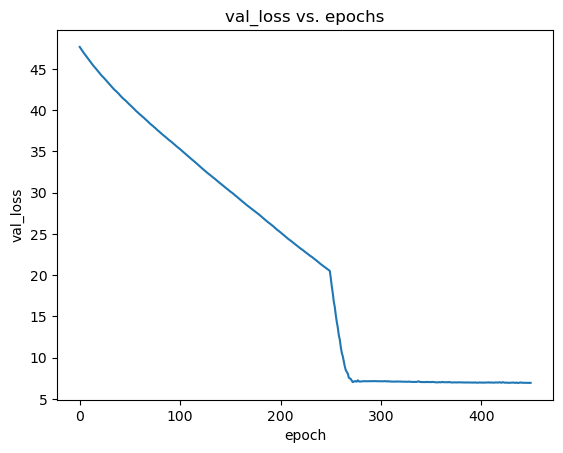

In [88]:
plt.plot(model.history)
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs')

In [99]:
def predict_single(_input_, model):
    xb = x.unsqueeze(0)
    return model._prediction_(_input_)

In [100]:
test_loader = DataLoader(test_ds, 13)

In [101]:
for x,y in test_loader:
    break

In [102]:
predict_single(x, model), y

(tensor([[22.8493],
         [20.5389],
         [21.4104],
         [ 2.4986],
         [ 4.3740],
         [10.8011],
         [-2.0920],
         [21.4258],
         [22.9465],
         [24.7673],
         [17.3435],
         [23.8025],
         [23.2427]], grad_fn=<AddmmBackward0>),
 tensor([[23.7000],
         [22.8000],
         [48.3000],
         [ 8.8000],
         [11.7000],
         [23.8000],
         [11.7000],
         [24.6000],
         [16.7000],
         [32.4000],
         [27.0000],
         [39.8000],
         [24.6000]]))

In [103]:
torch.save(model.linear.state_dict(), 'SavedModel/T05_practice_boston_housing_linear.pth')